In [15]:
import pandas as pd
import os
import itertools
import numpy

# Open and read the stock file provided
csv_files_directory = "C:\\Users\\batuh\\Desktop\\all_data"

# Get a list of all CSV files in the directory
csv_files = [file for file in os.listdir(csv_files_directory) if file.endswith('.csv')]

# Initialize an empty list to store individual DataFrames
dfs = []

# Iterate through each CSV file and read its data into a DataFrame
for file in csv_files:
    # Construct the full path to the CSV file
    file_path = os.path.join(csv_files_directory, file)

    # Read the CSV file into a DataFrame
    df = pd.read_csv(file_path)

    # Append the DataFrame to the list
    dfs.append(df)

# Concatenate the list of DataFrames into a single DataFrame
combined_data = pd.concat(dfs, ignore_index=True)

# Convert the 'timestamp' column to datetime
combined_data['timestamp'] = pd.to_datetime(combined_data['timestamp'])

# Get unique company names from the "short_name" column
unique_companies = combined_data['short_name'].unique()

# Create a dictionary to store DataFrames for each unique company
company_dataframes = {}

# Iterate through unique company names and create a DataFrame for each
for company in unique_companies:
    company_dataframes[company] = combined_data[combined_data['short_name'] == company].reset_index(drop=True)

print(company_dataframes)


{'THYAO':                       timestamp   price short_name
0     2018-01-02 09:00:00+03:00   15.79      THYAO
1     2018-01-02 10:00:00+03:00   16.01      THYAO
2     2018-01-02 11:00:00+03:00   16.05      THYAO
3     2018-01-02 12:00:00+03:00   16.05      THYAO
4     2018-01-02 13:00:00+03:00   16.06      THYAO
...                         ...     ...        ...
12404 2022-12-23 14:00:00+03:00  142.00      THYAO
12405 2022-12-23 15:00:00+03:00  142.10      THYAO
12406 2022-12-23 16:00:00+03:00  141.00      THYAO
12407 2022-12-23 17:00:00+03:00  141.90      THYAO
12408 2022-12-23 18:00:00+03:00  141.80      THYAO

[12409 rows x 3 columns], 'AKBNK':                       timestamp    price short_name
0     2018-01-02 09:00:00+03:00   6.9475      AKBNK
1     2018-01-02 10:00:00+03:00   7.0602      AKBNK
2     2018-01-02 11:00:00+03:00   7.0954      AKBNK
3     2018-01-02 12:00:00+03:00   7.0814      AKBNK
4     2018-01-02 13:00:00+03:00   7.1024      AKBNK
...                         ..

In [16]:
garan_prices = company_dataframes['GARAN']['price']
akbnk_prices = company_dataframes['AKBNK']['price']


In [17]:
diff_garan_akbnk= garan_prices-akbnk_prices
diff_garan_akbnk

0        2.2572
1        2.2555
2        2.2460
3        2.2428
4        2.2304
          ...  
12404    9.7627
12405    9.8063
12406    9.6370
12407    9.7865
12408    9.7956
Name: price, Length: 12409, dtype: float64

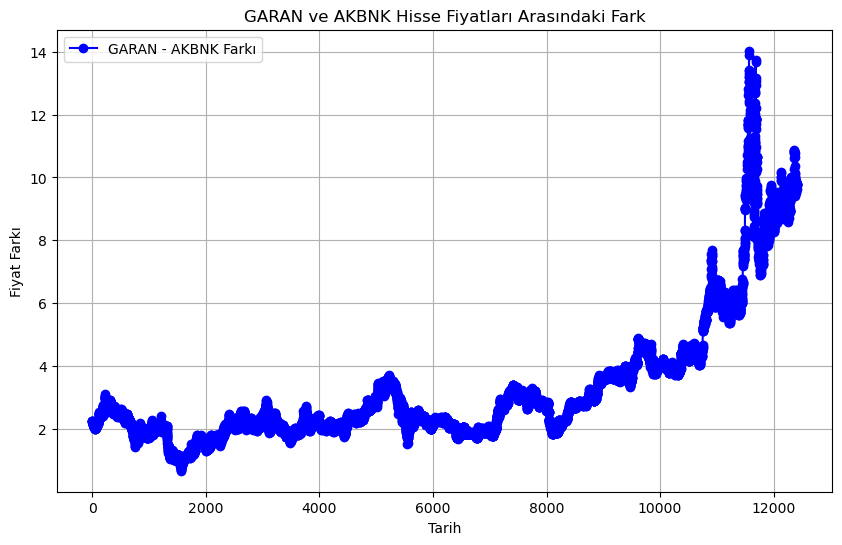

In [18]:
import matplotlib.pyplot as plt

# diff_garan_akbnk'yi çizgi grafiği ile görselleştirme
plt.figure(figsize=(10, 6))
plt.plot(diff_garan_akbnk.index, diff_garan_akbnk.values, label='GARAN - AKBNK Farkı', color='blue', marker='o')
plt.title('GARAN ve AKBNK Hisse Fiyatları Arasındaki Fark')
plt.xlabel('Tarih')
plt.ylabel('Fiyat Farkı')
plt.legend()
plt.grid(True)
plt.show()


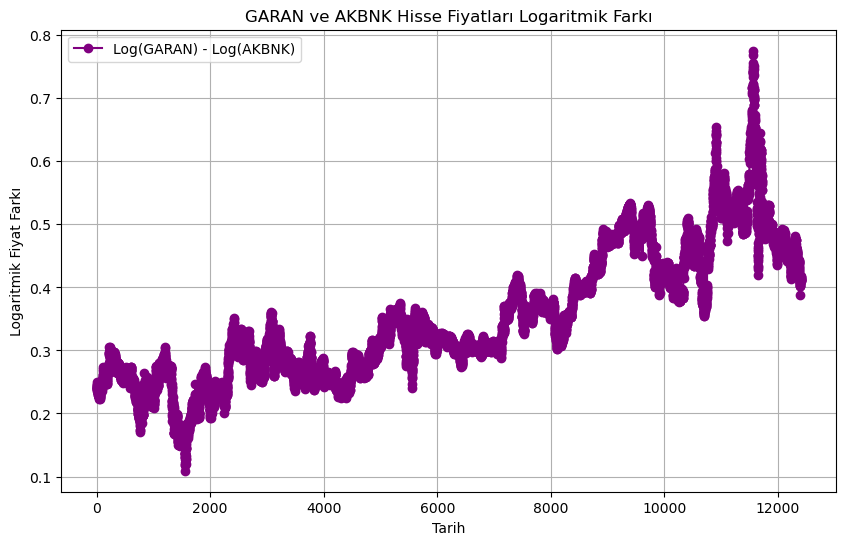

In [19]:
import numpy as np

# GARAN ve AKBNK hisse fiyatlarının logaritmalarını al
log_garan_prices = np.log1p(company_dataframes['GARAN']['price'])
log_akbnk_prices = np.log1p(company_dataframes['AKBNK']['price'])

# Logaritmik farkı hesapla
log_diff_garan_akbnk = log_garan_prices - log_akbnk_prices

# Logaritmik farkları çizgi grafiği ile görselleştir
plt.figure(figsize=(10, 6))
plt.plot(log_diff_garan_akbnk.index, log_diff_garan_akbnk.values, label='Log(GARAN) - Log(AKBNK)', color='purple', marker='o')
plt.title('GARAN ve AKBNK Hisse Fiyatları Logaritmik Farkı')
plt.xlabel('Tarih')
plt.ylabel('Logaritmik Fiyat Farkı')
plt.legend()
plt.grid(True)
plt.show()


ADF Statistic: -2.402353591882051
p-value: 0.1410732264038833


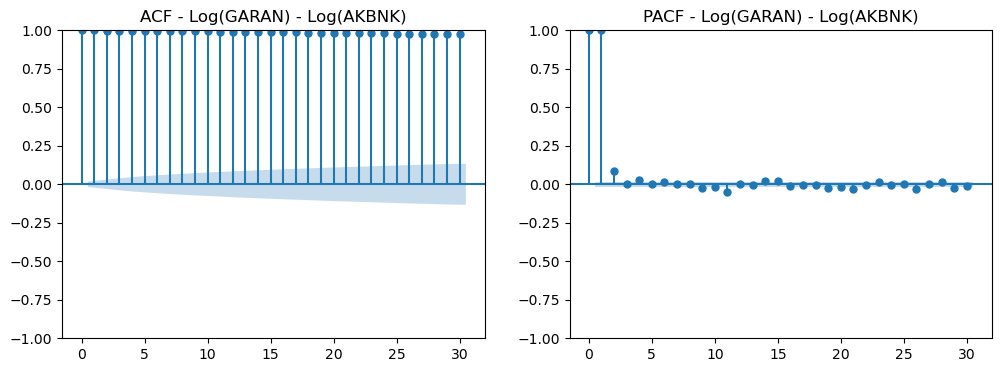

In [20]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.stattools import adfuller

# Veriye ADF testi uygula
result = adfuller(log_diff_garan_akbnk.dropna())
print('ADF Statistic:', result[0])
print('p-value:', result[1])

# ACF ve PACF grafiklerini çiz
fig, ax = plt.subplots(1, 2, figsize=(12, 4))

plot_acf(log_diff_garan_akbnk.dropna(), lags=30, ax=ax[0])
ax[0].set_title('ACF - Log(GARAN) - Log(AKBNK)')

plot_pacf(log_diff_garan_akbnk.dropna(), lags=30, ax=ax[1])
ax[1].set_title('PACF - Log(GARAN) - Log(AKBNK)')

plt.show()


ADF Statistic (First Diff): -17.230150208230537
p-value (First Diff): 6.2001528203829366e-30


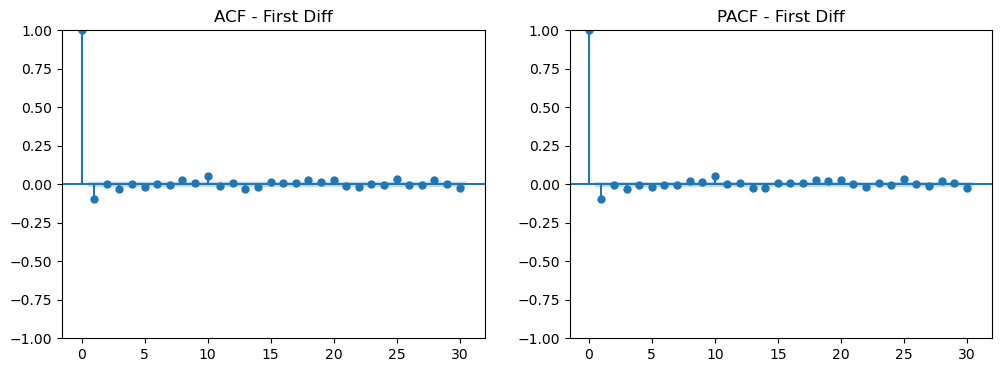

ACF Değerleri:
[ 1.00000000e+00 -9.65040088e-02  4.88470367e-03 -2.85339580e-02
  3.10920053e-03 -1.49687780e-02 -2.87319460e-04 -3.86176217e-03
  2.49693838e-02  1.14144516e-02  5.10704726e-02 -1.07324555e-02
  8.26936192e-03 -3.11417890e-02 -1.53985090e-02  1.23771621e-02
  5.72938998e-03  5.60606276e-03  2.61178530e-02  1.66237329e-02
  2.84379801e-02 -7.94810630e-03 -1.78389805e-02  3.95520871e-03
 -7.38842349e-03  3.67783225e-02 -1.83522387e-03 -5.94612467e-03
  2.48665118e-02  3.07466807e-03 -2.23534818e-02]

PACF Değerleri:
[ 1.00000000e+00 -9.65117870e-02 -4.47067612e-03 -2.87672389e-02
 -2.42585540e-03 -1.51264920e-02 -4.03232871e-03 -4.38781943e-03
  2.35822900e-02  1.61403512e-02  5.40809623e-02  8.94781716e-04
  8.51024005e-03 -2.63014444e-02 -2.09669675e-02  1.08303895e-02
  5.89946965e-03  5.51522617e-03  2.46687716e-02  2.02635989e-02
  3.03842974e-02  1.25514193e-03 -1.62495893e-02  5.99221931e-03
 -5.52082395e-03  3.46298480e-02  2.95712914e-03 -1.00325710e-02
  2.1464

In [21]:
# İlk farkı al
first_diff = log_diff_garan_akbnk.diff().dropna()

# ADF testi uygula
result_first_diff = adfuller(first_diff)
print('ADF Statistic (First Diff):', result_first_diff[0])
print('p-value (First Diff):', result_first_diff[1])

# ACF ve PACF grafiklerini çiz
fig, ax = plt.subplots(1, 2, figsize=(12, 4))

plot_acf(first_diff, lags=30, ax=ax[0])
ax[0].set_title('ACF - First Diff')

plot_pacf(first_diff, lags=30, ax=ax[1])
ax[1].set_title('PACF - First Diff')

plt.show()

from statsmodels.tsa.stattools import acf, pacf

# ACF ve PACF hesapla
acf_values, confint_acf = acf(first_diff, nlags=30, alpha=0.05)
pacf_values, confint_pacf = pacf(first_diff, nlags=30, alpha=0.05)

# ACF ve PACF değerlerini yazdır
print("ACF Değerleri:")
print(acf_values)
print("\nPACF Değerleri:")
print(pacf_values)






In [22]:
# we choose the ARIMA(1,1,1) model due to adf with first differcing and we determine the p and q with using acf and pacf function.After the first lag for acf and pacf there is no correlation can be said.

In [63]:
from statsmodels.tsa.arima.model import ARIMA

# ARIMA modelini kur
model = ARIMA(log_diff_garan_akbnk, order=(1, 1, 1))
fit_model = model.fit()

# Modelin özelliklerini yazdır
print(fit_model.summary())


                               SARIMAX Results                                
Dep. Variable:                  price   No. Observations:                12409
Model:                 ARIMA(1, 1, 1)   Log Likelihood               49860.575
Date:                Mon, 11 Dec 2023   AIC                         -99715.150
Time:                        20:45:44   BIC                         -99692.872
Sample:                             0   HQIC                        -99707.690
                              - 12409                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.0372      0.056     -0.663      0.507      -0.147       0.073
ma.L1         -0.0599      0.056     -1.077      0.281      -0.169       0.049
sigma2      1.893e-05   6.88e-08    275.299      0.0

c:\Users\batuh\anaconda3\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


In [24]:
#Now ARIMA(1,1,1) has the big p values in ar.l1 and ma.l1 so that we can try ARIMA(1,1,2)

In [64]:
from statsmodels.tsa.arima.model import ARIMA

# ARIMA modelini kur
model = ARIMA(log_diff_garan_akbnk, order=(1, 1, 2))
fit_model = model.fit()

# Modelin özelliklerini yazdır
print(fit_model.summary())


                               SARIMAX Results                                
Dep. Variable:                  price   No. Observations:                12409
Model:                 ARIMA(1, 1, 2)   Log Likelihood               49860.721
Date:                Mon, 11 Dec 2023   AIC                         -99713.441
Time:                        20:45:48   BIC                         -99683.737
Sample:                             0   HQIC                        -99703.494
                              - 12409                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.1889      0.002    -79.980      0.000      -0.194      -0.184
ma.L1          0.0917      0.002     38.509      0.000       0.087       0.096
ma.L2         -0.0166      0.005     -3.087      0.0

ARIMA(1,1,2) seems have the statistically significant coefficient values. We use ARIMA (1,1,2) process.

In [65]:
import statsmodels.tsa.arima.model 
# ARIMA(1,1,2) modelini kur
model_arima_112 = ARIMA(log_diff_garan_akbnk, order=(1, 1, 2))
fit_model_arima_112 = model_arima_112.fit()
fit_model_arima_112.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                  price   No. Observations:                12409
Model:                 ARIMA(1, 1, 2)   Log Likelihood               49860.721
Date:                Mon, 11 Dec 2023   AIC                         -99713.441
Time:                        20:45:55   BIC                         -99683.737
Sample:                             0   HQIC                        -99703.494
                              - 12409                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.1889      0.002    -79.980      0.000      -0.194      -0.184
ma.L1          0.0917      0.002     38.509      0.000       0.087       0.096
ma.L2         -0.0166      0.005     -3.087      0.002      -0.027      -0.006
sigma2      1.893e-05   6.88e-08    275.272      0.000    1.88e-05    1.91e-05
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):            269836.57
Prob(Q):                              0.99   Prob(JB):                         0.00
Heteroskedasticity (H):               1.66   Skew:                             0.40
Prob(H) (two-sided):                  0.00   Kurtosis:                        25.83
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
[2] Covariance matrix is singular or near-singular, with condition number 1.1e+18. Standard errors may be unstable.
"""

In [90]:
from statsmodels.tsa.arima.model import ARIMA
import pandas as pd

# ARIMA modelini kur
model = ARIMA(log_diff_garan_akbnk, order=(1, 1, 2))
fit_model = model.fit()

# Tahmin adımlarını belirle
forecast_steps = 10

# Başlangıç verisinin sonunu al
last_data_point = log_diff_garan_akbnk.index[-1]

# last_data_point'i datetime türünde bir nesneye dönüştür
last_data_point = pd.to_datetime(last_data_point)

# Tahmin adımlarını kullanarak yeni tahminler yap
for step in range(1, forecast_steps + 1):
    new_forecast = fit_model.get_forecast(steps=step).predicted_mean.iloc[-1]
    forecast_date = last_data_point + pd.DateOffset(days=step)
    print(f"Tahmin {forecast_date}: {new_forecast}")


Tahmin 1970-01-02 00:00:00.000012408: 0.4176714252682545
Tahmin 1970-01-03 00:00:00.000012408: 0.4176713249204529
Tahmin 1970-01-04 00:00:00.000012408: 0.4176713438756084
Tahmin 1970-01-05 00:00:00.000012408: 0.4176713402950823
Tahmin 1970-01-06 00:00:00.000012408: 0.4176713409714243
Tahmin 1970-01-07 00:00:00.000012408: 0.41767134084366697
Tahmin 1970-01-08 00:00:00.000012408: 0.4176713408677996
Tahmin 1970-01-09 00:00:00.000012408: 0.4176713408632411
Tahmin 1970-01-10 00:00:00.000012408: 0.4176713408641022
Tahmin 1970-01-11 00:00:00.000012408: 0.41767134086393953


C:\Users\batuh\AppData\Local\Temp\ipykernel_12984\4156123722.py:20: UserWarning: Discarding nonzero nanoseconds in conversion.
  forecast_date = last_data_point + pd.DateOffset(days=step)


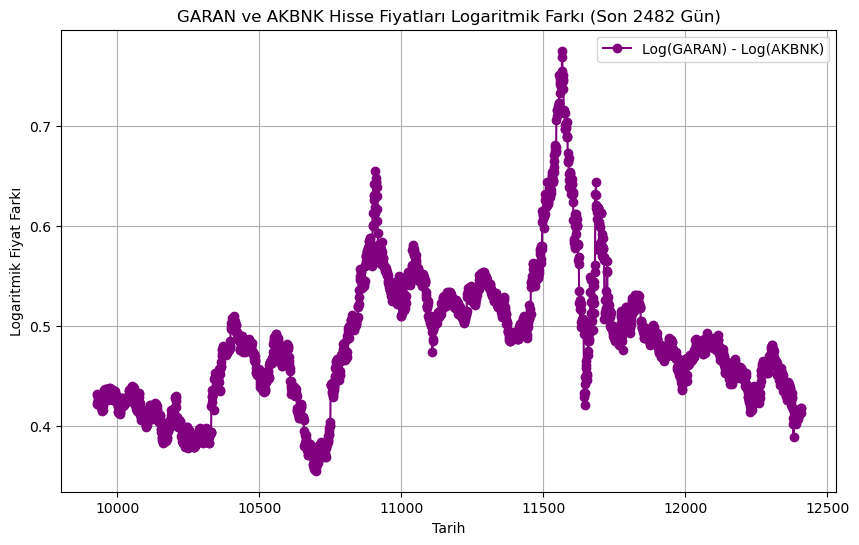

In [97]:
# Logaritmik farkları çizgi grafiği ile görselleştir
plt.figure(figsize=(10, 6))
plt.plot(log_diff_garan_akbnk.index[-forecast_steps:], log_diff_garan_akbnk.values[-forecast_steps:], label='Log(GARAN) - Log(AKBNK)', color='purple', marker='o')
plt.title('GARAN ve AKBNK Hisse Fiyatları Logaritmik Farkı (Son 2482 Gün)')
plt.xlabel('Tarih')
plt.ylabel('Logaritmik Fiyat Farkı')
plt.legend()
plt.grid(True)
plt.show()


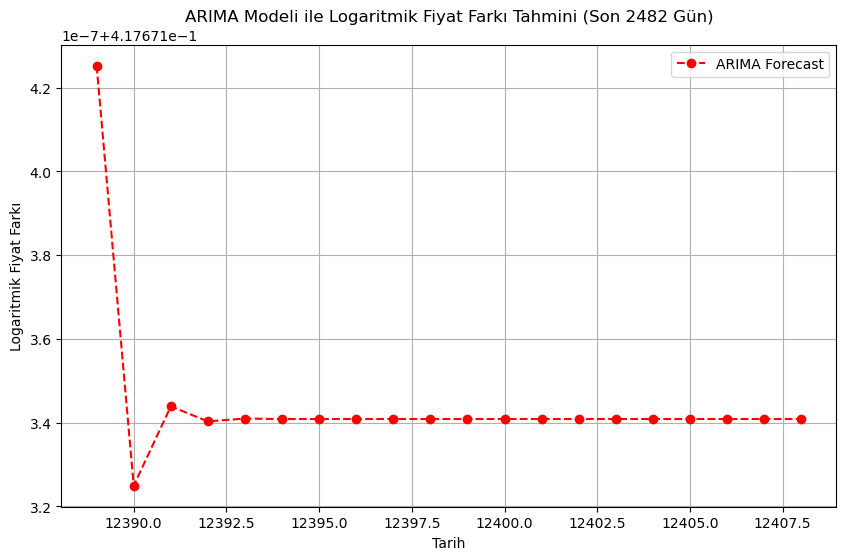

In [102]:
# Tahmin adımlarını kullanarak yeni tahminler yap
forecast_steps = 20
forecast_values = []

for step in range(1, forecast_steps + 1):
    new_forecast = fit_model.get_forecast(steps=step).predicted_mean.iloc[-1]
    forecast_values.append(new_forecast)

# Tahmin edilen değerleri çizgi grafiği ile görselleştir
plt.figure(figsize=(10, 6))
plt.plot(log_diff_garan_akbnk.index[-forecast_steps:], forecast_values, label='ARIMA Forecast', color='red', linestyle='dashed', marker='o')
plt.title('ARIMA Modeli ile Logaritmik Fiyat Farkı Tahmini (Son 2482 Gün)')
plt.xlabel('Tarih')
plt.ylabel('Logaritmik Fiyat Farkı')
plt.legend()
plt.grid(True)
plt.show()


